##Create indicative variables for homelessness
based on 
http://fragilefamilies.princeton.edu/sites/fragilefamilies/files/researchbrief43.pdf (KAG)


In [1]:
# Purpose: Add indicative variables for homelessness based on http://fragilefamilies.princeton.edu/sites/fragilefamilies/files/researchbrief43.pdf
# Inputs: raw background.csv file, data_mean_imputed.csv
# Outputs: a single mean imputed df which includes the two features added by this file
# Machine: Laptop, Runtime ~10 mins

In [2]:
# Used Packages
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Random Seed
np.random.seed(0)

In [3]:
df = pd.read_csv('../data/background.csv',index_col='challengeID')


In [4]:
np.shape(df)

(4242, 12942)

In [5]:
def combine_boolean_variables(variables, weights):
# combines the variables. True gets 1, anything else gets zero. 

#First extract the interesting varialbes into a dataframe.
    df_out  = df[variables]
# Anything that is not True (or 1), set to zero. 
    df_out[df_out != 1]= 0
#loop over the variables and apply the weight
    for i in range(len(variables)):
        variable, weight = (variables[i], weights[i])
        df_out[variable] *= weight
#Now add the weighted variables together
    return df_out.sum(axis=1)

                   
                   

Mother receives welfare

In [6]:
# Now construct mother receives welfare. Give more weight to the last wave (3), 
# and equal weight to the previous waves.

cmw = combine_boolean_variables( ['m2h10a', 'm3i8a1', 'm4i10', 'm5f10' ],[1,1,1,3] )

In [7]:
# Now construct mother resies in pulbic housing. Give more weight to the last wave (3), 
# and equal weight to the previous waves.

cph = combine_boolean_variables(  ['m1f3', 'm2h5', 'm3i5', 'm4i5', 'm5f5' ],[1,1,1,1,3]  )


In [8]:
# Now construct mother is living with father. Give more weight to the last wave (3), 
# and equal weight to the previous waves.

clf = combine_boolean_variables(['m1b20', 'm2l3', 'm2l10', 'm3a4a1', 'm4a4a1' ], [1, 1, 1, 1, 3])



In [9]:
# Now construct mother is Black or hispanic. Weight of 3 . 

df_bh = df['cm1ethrace']
# zero any value that is not black (2), or hispanic (3)
df_bh[ (df_bh !=2) & (df_bh !=3)] = 0

df_bh *= 3



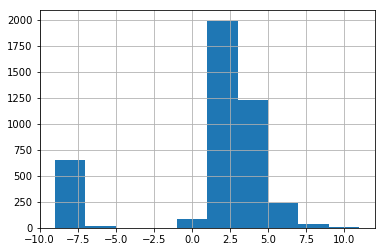

In [10]:
#Now construct number of kids in household. 
# 3 if more than 2 kids 

df_num_kids = df['cm4kids']
df_num_kids.hist()
df_num_kids[ df_num_kids <= 2] = 0
df_num_kids[ df_num_kids > 2] = 3



In [11]:
print(cmw.shape, cph.shape, clf.shape, df_bh.shape, df_num_kids.shape)

(4242,) (4242,) (4242,) (4242,) (4242,)


In [12]:
homeless_ind_neg = cmw + cph + clf + df_bh + df_num_kids



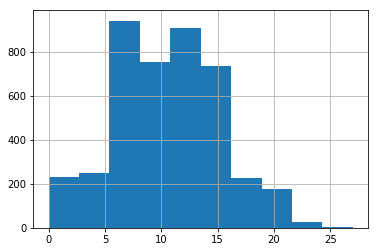

In [13]:
homeless_ind_neg.hist()

Now calcualte the factors affecting homelssness positvely

In [14]:
# Mother more than 5 years in the same negiberhood
df_yrs_nghd = df['m1f1a']
df_yrs_nghd[df_yrs_nghd<5] = 0
df_yrs_nghd[df_yrs_nghd>=5] = 1


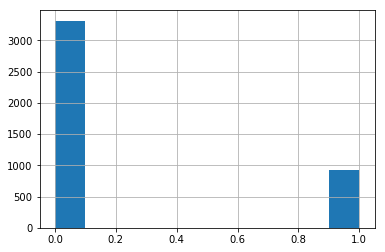

In [15]:
# Mother family/friends are willing to help
df_wh = df['m5f23g']
df_wh[ df_wh != 1] =0
df_wh.hist()

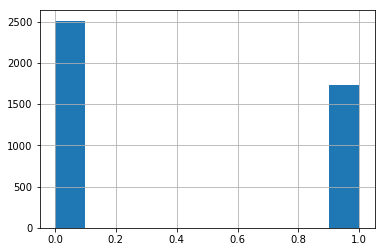

In [16]:
#numer of moves between birts and 1 year
df_nm = df['m2h1a']
#df_nm.hist()
df_nm[df_nm<1] = 0
df_nm[df_nm >=1] =1
df_nm.hist()
#df_nm.hist()

In [17]:
homeless_ind_pos = df_yrs_nghd + df_wh +df_nm

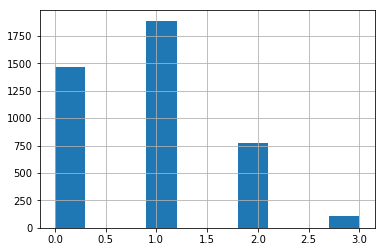

In [18]:
homeless_ind_pos.hist()

Now write the two features to the imputed clean data.


In [19]:
df_cleaned = pd.read_csv('../output/data_mean_imputed.csv',index_col='challengeID')

In [21]:
np.shape(df_cleaned)

(4242, 24864)

In [22]:
df_cleaned["homeless_ind_neg"] = homeless_ind_neg
df_cleaned["homeless_ind_pos"] = homeless_ind_pos

In [23]:
np.shape(df_cleaned)

(4242, 24866)

In [24]:
df_cleaned.to_csv('../output/data_mean_imputed_Homeless_added.csv',index_label='challengeID')